In [1]:
#-Legend--------------------------------------------------------------------
#Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
#EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
#RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'
#---------------------------------------------------------------------------
import pandas as pd
import math
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats

warnings.filterwarnings("ignore")    # Ignore warnings

ibm = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
ibm.dropna(inplace=True)
ibm.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


Outcome Variable: Attrition
Categorical Variables:Education, Department
Continuous Variables: Age, Daily Rate, Total Working Years

Text(0.5,1,'Attrition based on Education')

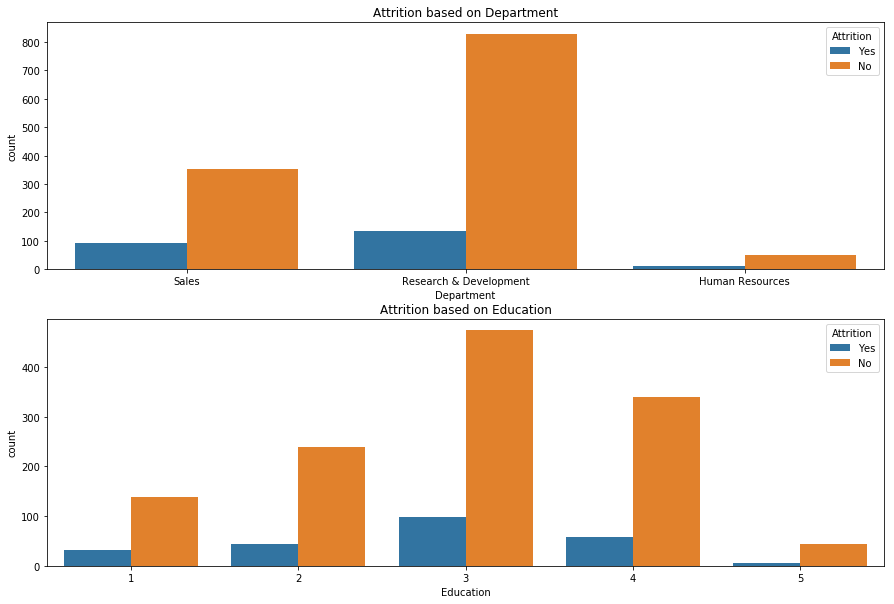

In [2]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
sb.countplot(data=ibm, x="Department", hue="Attrition")
plt.title('Attrition based on Department')
plt.subplot(2, 1, 2)
sb.countplot(data=ibm, x="Education", hue="Attrition")
plt.title('Attrition based on Education')

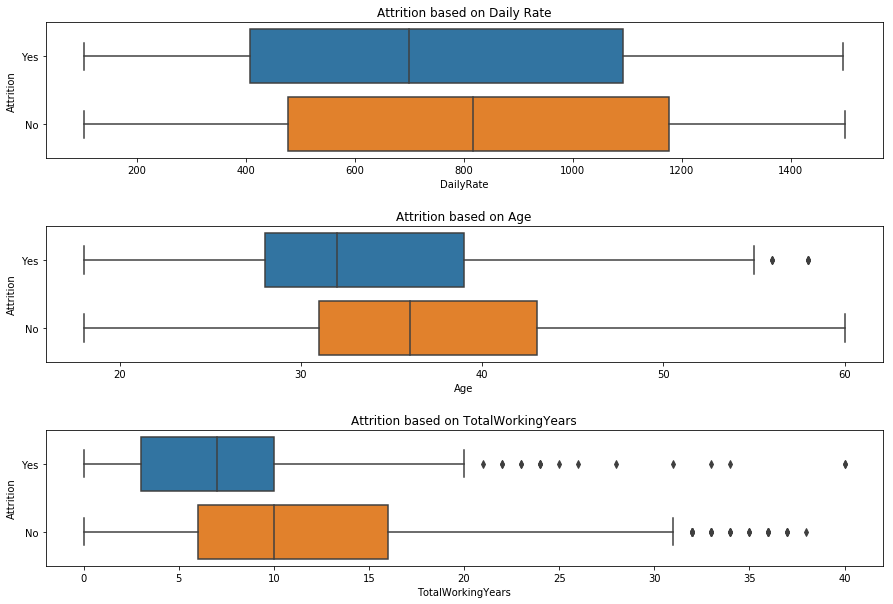

In [3]:
plt.figure(figsize=(15,10))
plt.subplot(3, 1, 1)
sb.boxplot(x=ibm.DailyRate, y=ibm.Attrition)
plt.title('Attrition based on Daily Rate')
plt.subplot(3, 1, 2)
sb.boxplot(x=ibm.Age, y=ibm.Attrition)
plt.title('Attrition based on Age')
plt.subplot(3, 1, 3)
sb.boxplot(x=ibm.TotalWorkingYears, y=ibm.Attrition)
plt.title('Attrition based on TotalWorkingYears')
plt.subplots_adjust(hspace=0.5)

In [4]:
ibm_cont = ibm.loc[:,['Attrition','Age','DailyRate','TotalWorkingYears']]
print(ibm_cont.groupby('Attrition').describe())
#Questin: Anyway to make the descibe more clean?

              Age                                                   DailyRate  \
            count       mean      std   min   25%   50%   75%   max     count   
Attrition                                                                       
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0    1233.0   
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0     237.0   

                       ...                  TotalWorkingYears             \
                 mean  ...      75%     max             count       mean   
Attrition              ...                                                 
No         812.504461  ...   1176.0  1499.0            1233.0  11.862936   
Yes        750.362869  ...   1092.0  1496.0             237.0   8.244726   

                                                 
                std  min  25%   50%   75%   max  
Attrition                                        
No         7.760719  0.0  6.0  10.0  16.0  38.0  
Yes        7.

In [5]:
features = pd.get_dummies(ibm['Education'])
features['E-Level'] = np.where((ibm['Education'].isin([1, 2])), 'Low', 'High')
print(pd.crosstab(features['E-Level'], ibm['Education']))

Education    1    2    3    4   5
E-Level                          
High         0    0  572  398  48
Low        170  282    0    0   0


In [6]:
features['Adult_30plus'] = np.where(ibm['Age']>=30,1,0)
print(ibm['Age'].groupby(features['Adult_30plus']).describe())

               count       mean       std   min   25%   50%   75%   max
Adult_30plus                                                           
0              326.0  25.711656  3.043730  18.0  24.0  27.0  28.0  29.0
1             1144.0  40.118881  7.651865  30.0  34.0  38.0  45.0  60.0


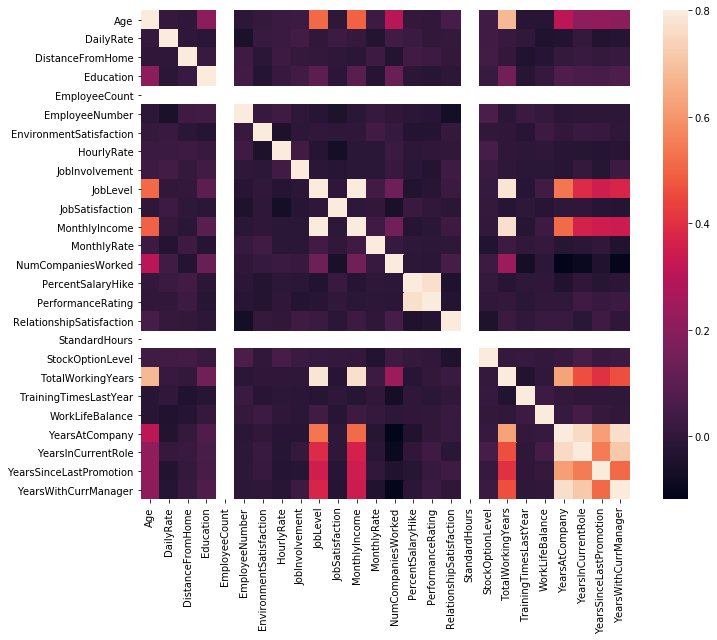

In [7]:
corrmat = ibm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8,square=True)
plt.show()

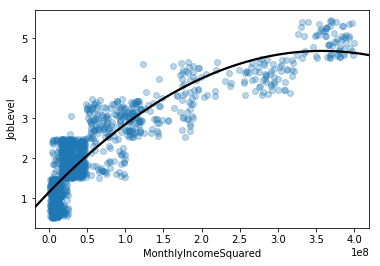

In [9]:
features['MonthlyIncomeSquared'] = ibm['MonthlyIncome'] * ibm['MonthlyIncome']
sb.regplot(
    features['MonthlyIncomeSquared'],
    y=ibm['JobLevel'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

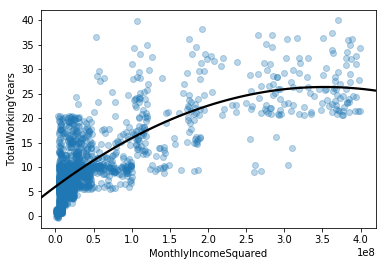

In [10]:
sb.regplot(
    features['MonthlyIncomeSquared'],
    y=ibm['TotalWorkingYears'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

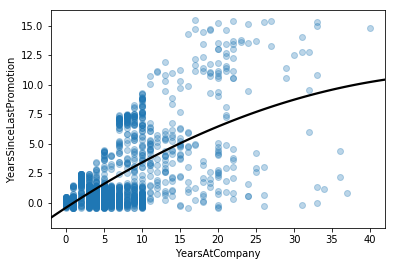

In [11]:
sb.regplot(
    ibm['YearsAtCompany'],
    y=ibm['YearsSinceLastPromotion'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

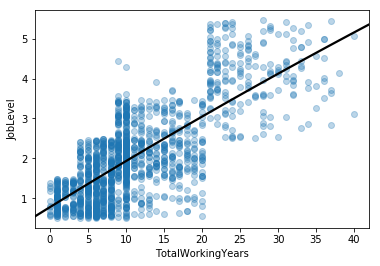

In [15]:
sb.regplot(
    ibm['TotalWorkingYears'],
    y=ibm['JobLevel'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

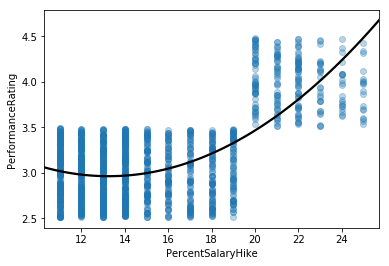

In [16]:
sb.regplot(
    ibm['PercentSalaryHike'],
    y=ibm['PerformanceRating'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()